In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_train = pd.read_csv("data/Higgs_train.csv")
data_test = pd.read_csv("data/Higgs_test.csv")
X_train = data_train.iloc[:, data_train.columns != "class"].values
y_train = data_train["class"].values
X_test = data_test.iloc[:, data_test.columns != "class"].values
y_test = data_test["class"].values

A function performing cross validation at varying tree depths

In [3]:
def calc_meanstd(X_train, y_train, depths, cv):
    cvmeans = []
    cvstds = []
    train_scores = []
    
    for depth in depths:
        clf = DecisionTreeClassifier(max_depth=depth)
        train_scores.append(clf.fit(X_train, y_train).score(X_train, y_train))
        scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=cv)
        cvmeans.append(scores.mean())
        cvstds.append(scores.std())
        
    return cvmeans, cvstds, train_scores

A function to visualize cross validation results

In [4]:
def plot_cv_results(
    depths, cvmeans, cvstds, train_scores, title, limit_y=False, show_legend=True,
):

    plt.figure(figsize=(9, 4.5))
    plt.plot(
        depths,cvmeans,
        "^-",
        label="Mean validation",
        markeredgecolor="k",
        color="tab:orange",
        alpha=0.7,
        linewidth=2,
    )
    plt.fill_between(
        depths,
        cvmeans - 2*cvstds,
        cvmeans + 2*cvstds,
        color="tab:orange",
        alpha=0.3,
        label="Validation +/-2 standard deviations",
    )
    
    if limit_y:
        ylim = plt.ylim()
        plt.ylim(ylim)
    
    plt.plot(
        depths,
        train_scores,
        "o--",
        label="Training",
        color="tab:blue",
        alpha=0.4,
        linewidth=2,
    )

    if show_legend:
        plt.legend(fontsize=12)
    
    plt.ylabel("Accuracy", fontsize=12)
    plt.xlabel("Maximum tree depth", fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(depths)
    plt.grid(":", alpha=0.4)
    plt.tight_layout()
    plt.show()

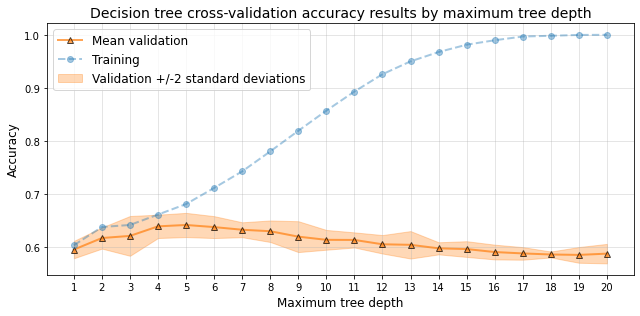

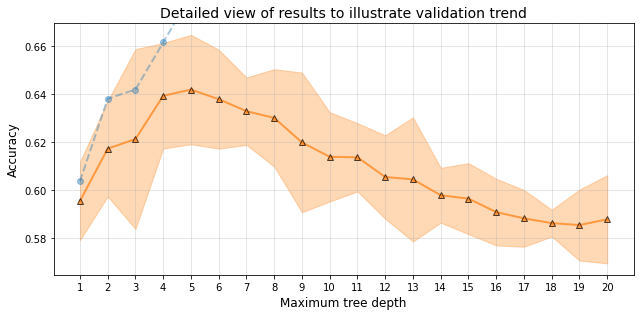

In [5]:
depths = list(range(1, 21))
cv = 5

cvmeans, cvstds, train_scores = calc_meanstd(
    X_train, y_train, depths, cv
)

cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)

title = (
    "Decision tree cross-validation accuracy results by "
    "maximum tree depth"
)
plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=False,
    show_legend=True,
)

title = (
    "Detailed view of results to illustrate validation trend"
)
plot_cv_results(
    depths,
    cvmeans,
    cvstds,
    train_scores,
    title,
    limit_y=True,
    show_legend=False,
)